# CNN model to classify skin cancer

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [108]:
import tensorflow as tf

In [3]:
''' train_ds have totle 2239
    test_ds have totle 118 files 
    totle =2357 files , and train and test have 9 classe 
'''

' train_ds have totle 2239\n    test_ds have totle 118 files \n    totle =2357 files , and train and test have 9 classe \n'

# Create a dataset

In [4]:
batch_size = 32
img_height = 180
img_width = 180
channels = 3

In [5]:
# We will use seed=123 while creating dataset using tf.keras.preprocessing.image_dataset_from_directory
#  make sure your resize your images to the size img_height*img_width, while writting the dataset
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'Skin_cancer_data\Train',
    shuffle =True ,
    image_size =(img_height,img_width)  , # image_size =(180,180,3)
    batch_size = batch_size             # 32
)

Found 2239 files belonging to 9 classes.


In [6]:
len(train_data)

70

In [7]:
train_data.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [8]:
# Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
#  make sure your resize your images to the size img_height*img_width, while writting the dataset
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'Skin_cancer_data\Test',
    shuffle =True ,
    image_size =(img_height,img_width)  , # image_size =(180,180,3)
    batch_size = batch_size             # 32
)

Found 118 files belonging to 9 classes.


In [9]:
test_data.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [10]:
print(test_data)
print(train_data)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [11]:
# convert simple form 
# fetch 1 batch , 1 batch have 32 files  
for image_batch , lable_batch in test_data.take(1) :
    print('this is one batch shape :',image_batch.shape)  # (batch_size,img_height,img_width,chanells)  
    print('this is lable shape :',lable_batch.shape)


this is one batch shape : (32, 180, 180, 3)
this is lable shape : (32,)


In [12]:
# normal formn 
for image_batch , label_batch in train_data.take(1):
    print(image_batch.numpy())
    print('\n')
    print('convergt the lable in numeric : ',label_batch.numpy())

[[[[187.31725   147.31725   139.31725  ]
   [186.68158   146.68158   138.68158  ]
   [190.44167   150.44167   142.44167  ]
   ...
   [199.50278   169.50278   171.50278  ]
   [189.04616   165.94624   169.31288  ]
   [197.43217   176.85442   182.06554  ]]

  [[188.17676   148.17676   137.19342  ]
   [188.81361   148.81361   137.83028  ]
   [187.94351   147.94351   136.96019  ]
   ...
   [197.50833   167.50833   168.525    ]
   [194.04468   168.67804   171.67804  ]
   [190.60251   168.49518   171.81714  ]]

  [[187.        147.48611   134.02777  ]
   [189.        149.48611   136.02777  ]
   [186.05556   146.54167   133.08334  ]
   ...
   [197.05554   167.54166   164.56943  ]
   [198.34904   171.        170.65096  ]
   [193.17236   168.55585   170.51389  ]]

  ...

  [[201.10847   178.10847   172.10847  ]
   [201.51385   177.51385   173.51385  ]
   [204.97299   180.97299   180.97299  ]
   ...
   [187.48532   154.48532   145.48532  ]
   [189.02771   156.02771   151.02771  ]
   [189.02771   

In [13]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These class_names = correspond to the directory names in alphabetical order.
class_names = train_data.class_names
print(class_names)
n_classes = len(class_names)
print(n_classes)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
9


## Visualize data

(32, 180, 180, 3)
[4 3 8 1 4 1 5 6 3 8 5 4 5 6 1 5 1 3 1 3 1 4 4 3 3 4 2 3 7 5 4 3]


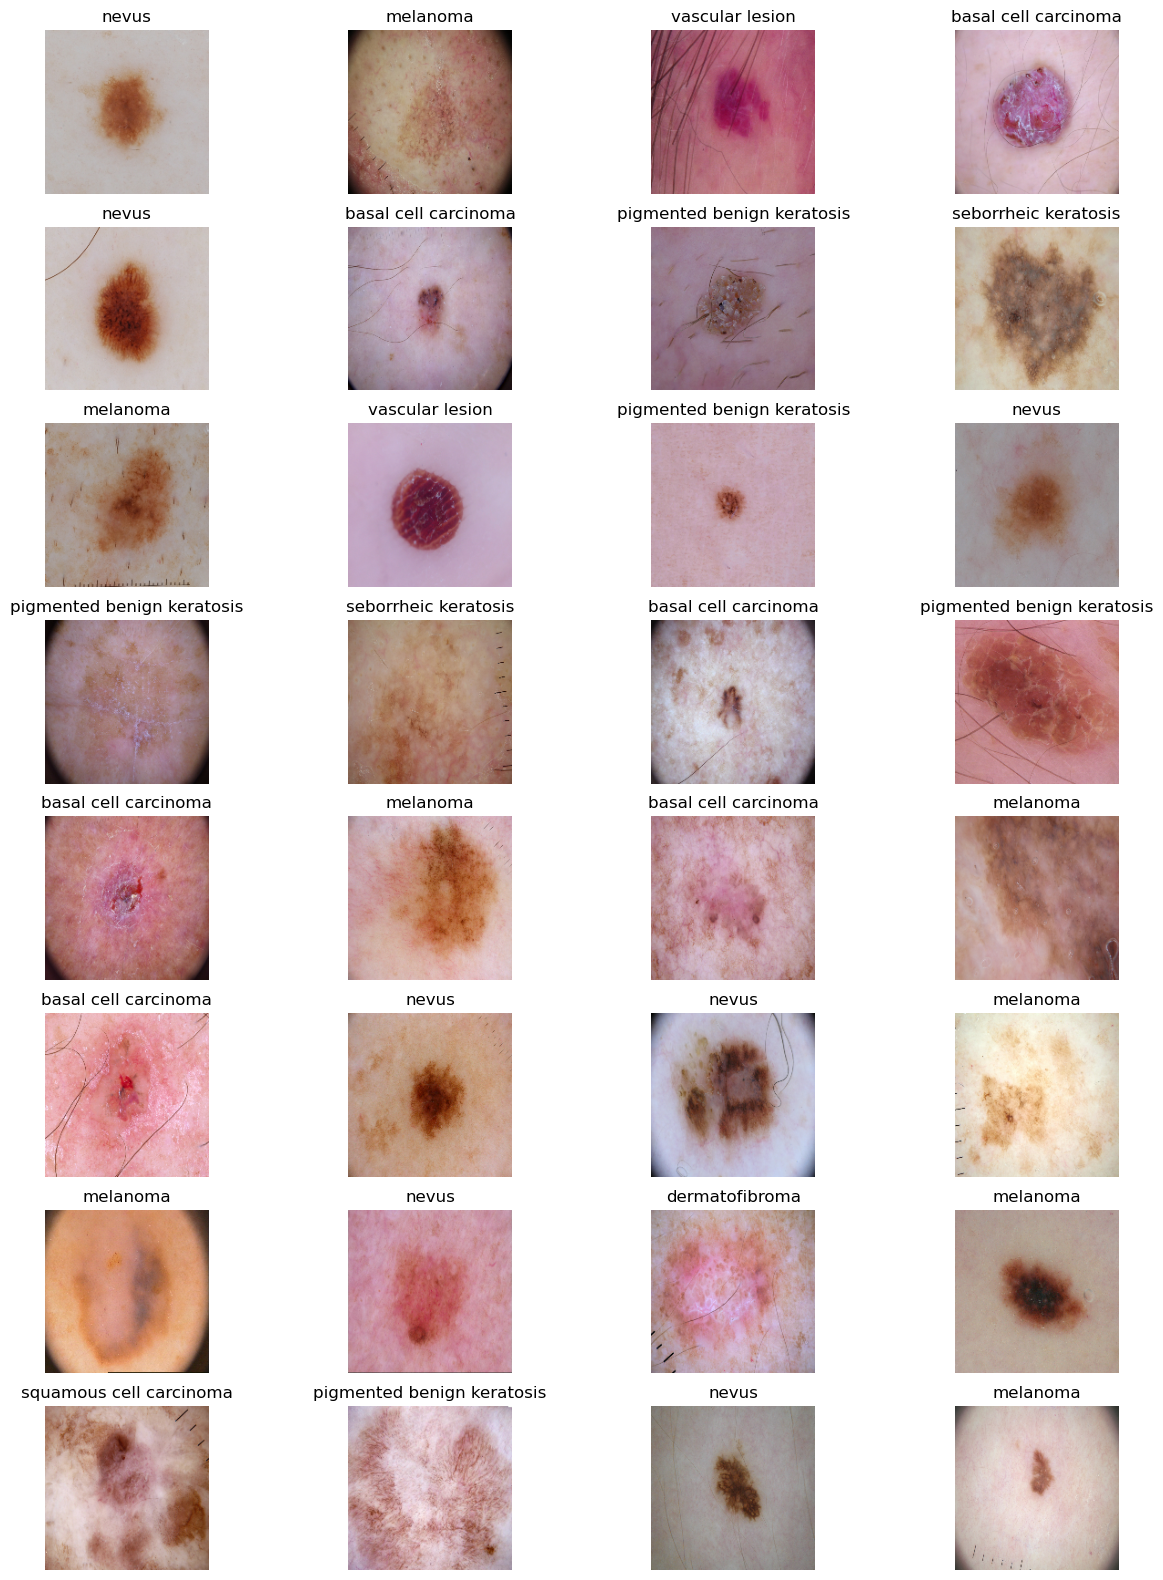

In [14]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(15,20))
for image_batch , labels_batch in train_data.take(1):
  print(image_batch.shape)
  print(labels_batch.numpy())
  for i in range(32):
    plt.subplot(8,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[labels_batch[i]])
    plt.axis('off')

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 
(the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are 
corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [15]:
# increases the perfomance, tune the values dynamically at runtime
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = test_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [16]:
# resize and rescale the value 
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(img_height,img_width),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [17]:
# data augmentation

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.3)
])

### Create the model
Create a CNN model, which can accurately detect 9 classes present in the dataset. 
Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). 
The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. 
Here, it is good to standardize values to be in the [0, 1]

In [18]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D ,BatchNormalization

In [19]:

input_shape = (batch_size , img_height , img_width , channels)

In [20]:
# create CNN model

model = Sequential()


model.add(resize_and_rescale)

model.add(data_augmentation)

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=input_shape))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(32,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dropout(0.10))

model.add(Dense(n_classes))

In [21]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
model.build(input_shape)

In [23]:
# View the summary of all layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 180, 180, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 180, 180, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 180, 180, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (32, 180, 180, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (32, 90, 90, 64)          0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (32, 90, 90, 64)          36928     
                                                      

In [24]:
epochs = 5

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5


70/70 [==============================] - 327s 4s/step - loss: 1.9588 - accuracy: 0.2662 - val_loss: 2.2080 - val_accuracy: 0.2203
Epoch 2/5
70/70 [==============================] - 271s 4s/step - loss: 1.6172 - accuracy: 0.4372 - val_loss: 2.3390 - val_accuracy: 0.2542
Epoch 3/5
70/70 [==============================] - 268s 4s/step - loss: 1.5132 - accuracy: 0.4712 - val_loss: 2.0286 - val_accuracy: 0.3390
Epoch 4/5
70/70 [==============================] - 266s 4s/step - loss: 1.4622 - accuracy: 0.4913 - val_loss: 2.0502 - val_accuracy: 0.3305
Epoch 5/5
70/70 [==============================] - 254s 4s/step - loss: 1.4244 - accuracy: 0.5163 - val_loss: 2.1739 - val_accuracy: 0.3475


### Results

In [25]:
# accuracy of model each epochs
history.history['accuracy']

[0.2661902606487274,
 0.43724876642227173,
 0.47119250893592834,
 0.49129074811935425,
 0.5163019299507141]

In [26]:
# validation accuracy of model each epochs
history.history['val_accuracy']

[0.22033898532390594,
 0.2542372941970825,
 0.33898305892944336,
 0.3305084705352783,
 0.347457617521286]

In [27]:
# lost
history.history['loss']

[1.9587727785110474,
 1.617185354232788,
 1.5132499933242798,
 1.4622200727462769,
 1.4243770837783813]

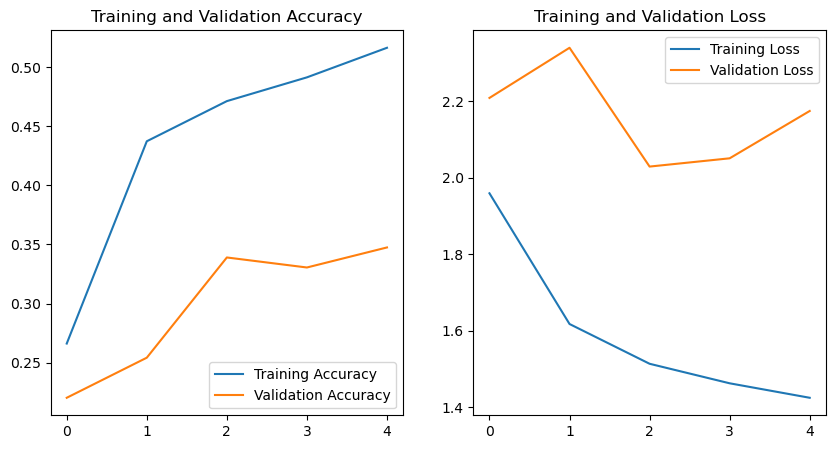

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


* Traning-accuracy = 27 and

* validation-accuracy = 30

this is underfit model not good acurracy of traning and validation dataset

## Improve the model with agumentation

In [29]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

# data augmentation


data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
  ]
)

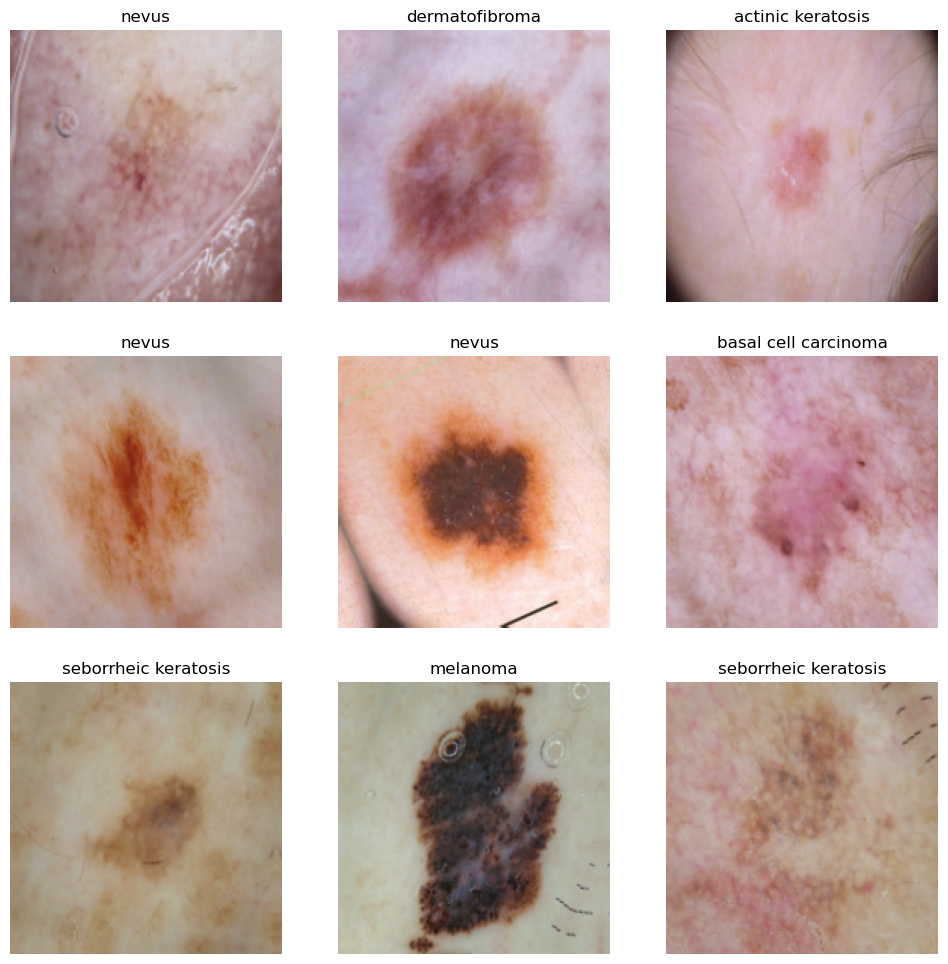

In [30]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(12, 12))
for images, labels in train_data.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [31]:
## You can use Dropout layer if there is an evidence of overfitting in your findings


model = Sequential()

model.add(data_augmentation)

model.add(resize_and_rescale)

model.add(Conv2D(16,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))


model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))


model.add(MaxPooling2D(2,2))

model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(n_classes))

In [32]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
## train your model for 5 epochs
epochs = 5

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5


70/70 [==============================] - 62s 853ms/step - loss: 1.8809 - accuracy: 0.3131 - val_loss: 2.2929 - val_accuracy: 0.1864
Epoch 2/5
70/70 [==============================] - 58s 832ms/step - loss: 1.5942 - accuracy: 0.4381 - val_loss: 2.1195 - val_accuracy: 0.3220
Epoch 3/5
70/70 [==============================] - 58s 835ms/step - loss: 1.4227 - accuracy: 0.5056 - val_loss: 2.0361 - val_accuracy: 0.3644
Epoch 4/5
70/70 [==============================] - 63s 900ms/step - loss: 1.3656 - accuracy: 0.5141 - val_loss: 2.5623 - val_accuracy: 0.3220
Epoch 5/5
70/70 [==============================] - 58s 830ms/step - loss: 1.3153 - accuracy: 0.5306 - val_loss: 2.2820 - val_accuracy: 0.4407


In [34]:
# accuracy of model each epochs
history.history['accuracy']

[0.31308621168136597,
 0.4381420314311981,
 0.505582869052887,
 0.5140687823295593,
 0.530593991279602]

In [35]:
# validation accuracy of model each epochs
history.history['val_accuracy']

[0.18644067645072937,
 0.32203391194343567,
 0.3644067943096161,
 0.32203391194343567,
 0.4406779706478119]

In [36]:
# loss of model each epochs
history.history['loss']

[1.8808637857437134,
 1.5942418575286865,
 1.4227434396743774,
 1.3656435012817383,
 1.3153127431869507]

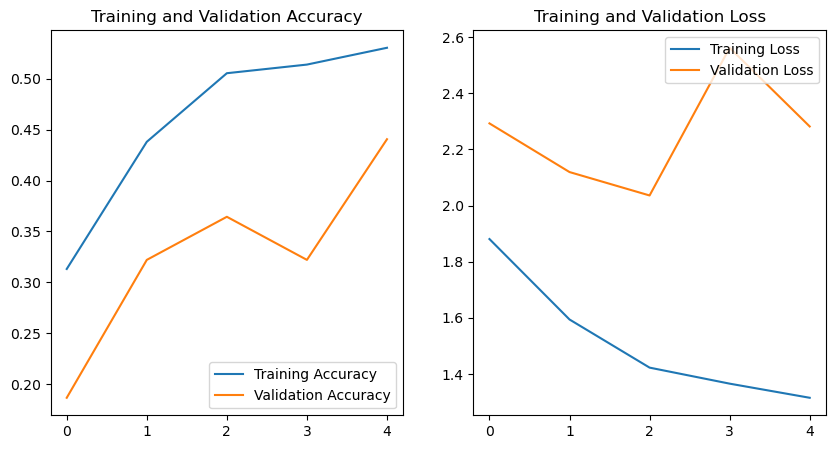

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



Although, the performance as imporved but, still is not at par, and is likely underfiting beacuse

Traning accuracy = 51 and

Validation accuracy = 38

Issue: Might be class imbalance

Find the distribution of classes in the training dataset.
Context: Many times real life datasets can have class imbalance, one class can have proportionately higher 
number of samples compared to the others. Class imbalance can have a detrimental effect on the final model
quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

## Evidence of class imbalance

In [38]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [39]:
data_dir_train = pathlib.Path(r"Skin_cancer_data\Train")
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

2239


[114, 376, 95, 438, 357, 462, 77, 181, 139]


<BarContainer object of 9 artists>

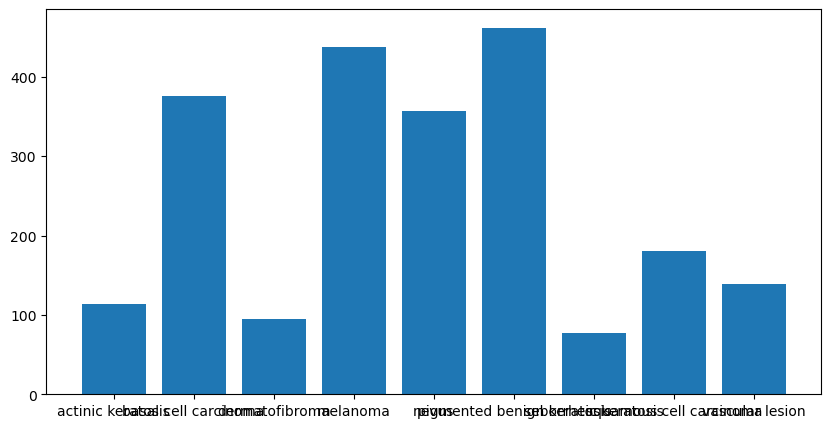

In [40]:
#plot number of images in each Class
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'/*.jpg'))))
print(count)
plt.figure(figsize=(10,5))
plt.bar(class_names,count)

## Rectify class imbalance


We can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) 
to add more samples across all classes so that none of the classes have very few samples.

In [41]:
!pip install Augmentor

To use Augmentor, the following general procedure is followed:

- Instantiate a Pipeline object pointing to a directory containing your initial image data set.
- Define a number of operations to perform on this data set using your Pipeline object.
- Execute these operations by calling the Pipeline’s sample() method.

In [42]:
training_data_path=str(data_dir_train)+'/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(training_data_path + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Skin_cancer_data\Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x14023362FD0>: 100%|██████████| 500/500 [00:11<00:00, 42.42 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to Skin_cancer_data\Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x140235061D0>: 100%|██████████| 500/500 [00:11<00:00, 42.65 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to Skin_cancer_data\Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x140233F2610>: 100%|██████████| 500/500 [00:12<00:00, 40.57 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to Skin_cancer_data\Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1242x1284 at 0x1402AFBAFD0>: 100%|██████████| 500/500 [01:06<00:00,  7.47 Samples/s]                  


Initialised with 357 image(s) found.
Output directory set to Skin_cancer_data\Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1402B2DE1D0>: 100%|██████████| 500/500 [00:56<00:00,  8.87 Samples/s]                    


Initialised with 462 image(s) found.
Output directory set to Skin_cancer_data\Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1402AFCC850>: 100%|██████████| 500/500 [00:11<00:00, 42.53 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to Skin_cancer_data\Train/seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1402B2DD510>: 100%|██████████| 500/500 [00:28<00:00, 17.37 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Skin_cancer_data\Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x140235CEB90>: 100%|██████████| 500/500 [00:11<00:00, 42.26 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to Skin_cancer_data\Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x14042318910>: 100%|██████████| 500/500 [00:11<00:00, 43.33 Samples/s]                  


<BarContainer object of 9 artists>

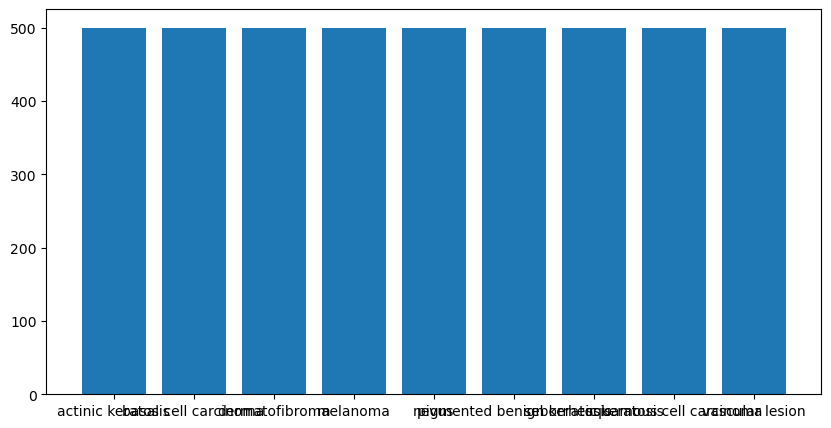

In [43]:
# Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. 
# Check the distribution of data.
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'*/output/*.jpg'))))
plt.figure(figsize=(10,5))
plt.bar(class_names,count)

### Final data after adding new agumented images to the original training data.

In [44]:
import os
from glob import glob

In [45]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['Skin_cancer_data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_0f83eb1a-5fac-48fb-bed8-850377dc2c23.jpg',
 'Skin_cancer_data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_19734a0a-b757-4764-a23b-e9df1b84d714.jpg',
 'Skin_cancer_data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_3c0663a9-95d3-42a5-a06e-073aae62673d.jpg',
 'Skin_cancer_data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_80f71387-4c0b-4a33-907c-52625db3a652.jpg',
 'Skin_cancer_data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_875a1867-6ac1-472a-86f2-a238a4d56674.jpg',
 'Skin_cancer_data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_af1ea123-faf7-4c02-a08d-fe12189a0d1e.jpg',
 'Skin_cancer_data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_96e93397-8e72-4bcc-85bc-a7c41218b0ad.jpg',
 'Skin_cancer

In [46]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new


['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [47]:
# store new agumented images in a dataframe
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
agumented_df = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [48]:
# Get Existing images in Dataframe
path_list=[]
lesion_list=[]
for name in class_names:
  for file in data_dir_train.glob(name+'/*.jpg'):
    path_list.append(str(file))
    lesion_list.append(name)

dataframe_dict_original=dict(zip(path_list,lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns=['Path','Label'])

In [49]:
# merge both the dataframes ..
new_df = original_df.append(agumented_df)

C:\Users\Ujjwal\AppData\Local\Temp\ipykernel_14248\949732306.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(agumented_df)


In [50]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. 
We can add more images as we want to improve training process.

## Now we will design a new model on the data created using Augmentor

In [51]:
batch_size = 32
img_height = 180
img_width = 180

In [66]:
'''This keras utility 'tf.keras.preprocessing.image_dataset_from_directory'
will read all the images in a directory, checks all the subdirectories ... and loads'''

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [65]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


### Model

In [67]:

AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(n_classes)
])

In [68]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [69]:
epochs = 10

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


169/169 [==============================] - 314s 1s/step - loss: 1.8643 - accuracy: 0.2954 - val_loss: 1.5787 - val_accuracy: 0.3912
Epoch 2/10
169/169 [==============================] - 146s 858ms/step - loss: 1.4209 - accuracy: 0.4596 - val_loss: 1.2860 - val_accuracy: 0.5115
Epoch 3/10
169/169 [==============================] - 142s 838ms/step - loss: 1.2100 - accuracy: 0.5618 - val_loss: 1.1837 - val_accuracy: 0.5642
Epoch 4/10
169/169 [==============================] - 138s 817ms/step - loss: 1.0349 - accuracy: 0.6176 - val_loss: 0.9994 - val_accuracy: 0.6429
Epoch 5/10
169/169 [==============================] - 137s 811ms/step - loss: 0.8486 - accuracy: 0.7001 - val_loss: 0.9403 - val_accuracy: 0.6897
Epoch 6/10
169/169 [==============================] - 140s 825ms/step - loss: 0.7423 - accuracy: 0.7342 - val_loss: 0.8469 - val_accuracy: 0.7112
Epoch 7/10
169/169 [==============================] - 150s 891ms/step - loss: 0.5792 - accuracy: 0.7930 - val_loss: 0.8251 - val_accuracy:

### Results

In [70]:
history.history['accuracy']

[0.29543769359588623,
 0.4595697224140167,
 0.5617581605911255,
 0.6175816059112549,
 0.7001112699508667,
 0.7342358827590942,
 0.7930266857147217,
 0.8442136645317078,
 0.8716617226600647,
 0.8696216344833374]

In [71]:
history.history['val_accuracy']

[0.39123979210853577,
 0.5115070343017578,
 0.5642167925834656,
 0.6429101824760437,
 0.6896807551383972,
 0.7112100720405579,
 0.7490720152854919,
 0.7416480779647827,
 0.7750557065010071,
 0.7505567669868469]

In [72]:
history.history['loss']

[1.8642849922180176,
 1.4209250211715698,
 1.209950566291809,
 1.0348825454711914,
 0.8486173152923584,
 0.7423121929168701,
 0.5792140364646912,
 0.45042112469673157,
 0.3640028238296509,
 0.37837648391723633]

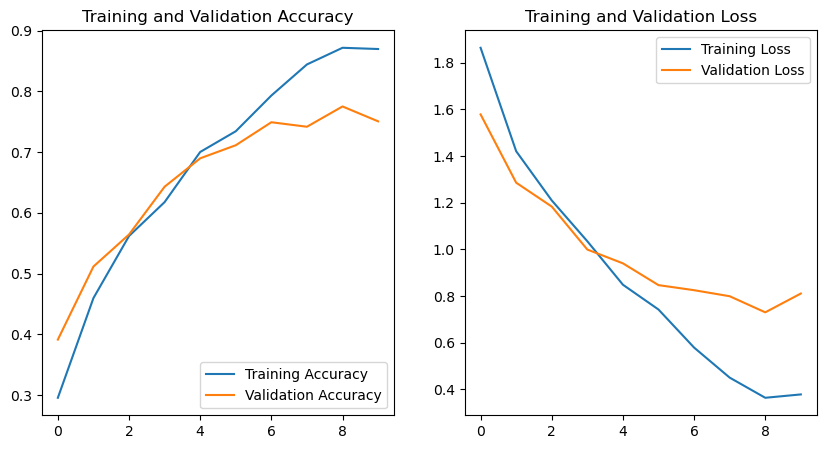

In [73]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Finally ....................... Above is a good model!

# Let's Test it

In [77]:
test_data_final = tf.keras.preprocessing.image_dataset_from_directory(
    r'Skin_cancer_data\Test',
    shuffle =True ,
    image_size =(img_height,img_width)  , # image_size =(180,180,3)
    batch_size = batch_size             # 32
)
test_data_final = test_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

Found 118 files belonging to 9 classes.


### Classification report

In [168]:
import keras_preprocessing
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    'Skin_cancer_data\Test', # Put your path here
    target_size=(img_width, img_height),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys()) 


report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

Found 118 images belonging to 9 classes.


C:\Users\Ujjwal\AppData\Local\Temp\ipykernel_14248\3646100048.py:11: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)
C:\Users\Ujjwal\AppData\Local\Temp\ipykernel_14248\3646100048.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)


                            precision    recall  f1-score   support

         actinic keratosis       0.33      0.06      0.11        16
      basal cell carcinoma       0.38      0.38      0.38        16
            dermatofibroma       0.60      0.19      0.29        16
                  melanoma       0.24      0.31      0.27        16
                     nevus       0.34      0.62      0.44        16
pigmented benign keratosis       0.35      0.69      0.47        16
      seborrheic keratosis       0.00      0.00      0.00         3
   squamous cell carcinoma       0.45      0.31      0.37        16
           vascular lesion       1.00      0.67      0.80         3

                  accuracy                           0.36       118
                 macro avg       0.41      0.36      0.35       118
              weighted avg       0.39      0.36      0.33       118



c:\Users\Ujjwal\anaconda3\envs\melanoma_env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ujjwal\anaconda3\envs\melanoma_env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ujjwal\anaconda3\envs\melanoma_env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

### Tensorflow to make confusion matrix

In [176]:
testData = tf.keras.preprocessing.image_dataset_from_directory( #324983
    'Skin_cancer_data\Test',
    labels='inferred',
    label_mode='categorical',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=32)


predictions = np.array([])
labels =  np.array([])
for x, y in testData:
  predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis = 1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()


Found 118 files belonging to 9 classes.
1/1 [==============================] - 0s 449ms/step


array([[ 2,  3,  0,  2,  7,  2,  0,  0,  0],
       [ 0,  7,  0,  2,  0,  3,  0,  4,  0],
       [ 2,  3,  3,  3,  1,  3,  0,  1,  0],
       [ 0,  0,  0,  6,  7,  3,  0,  0,  0],
       [ 0,  0,  0,  4, 11,  1,  0,  0,  0],
       [ 0,  1,  1,  1,  0, 12,  0,  1,  0],
       [ 0,  0,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  2,  1,  2,  3,  2,  0,  6,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  2]])

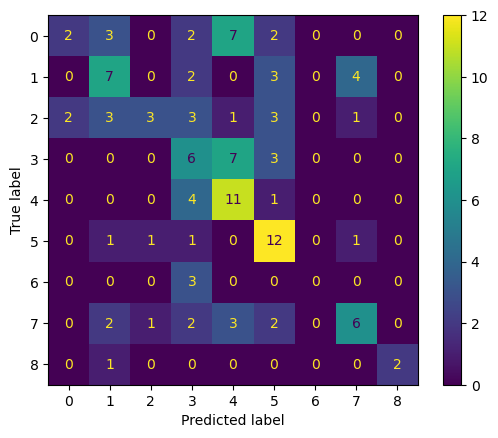

In [177]:
# Visualize the above matrix using sklearn 
cm = confusion_matrix(labels, predictions)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

### Direct predictions and cnf matrix 

Found 118 files belonging to 9 classes.


4/4 [==============================] - 6s 245ms/step


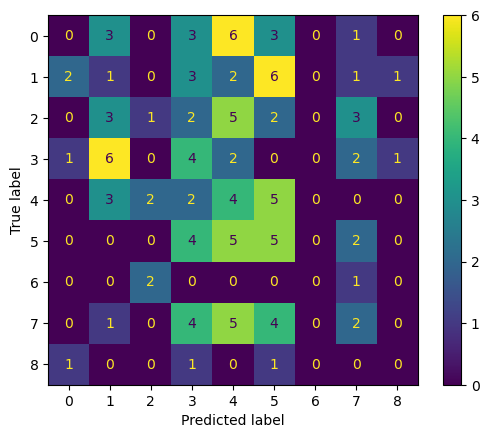

In [174]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_data_final = tf.keras.preprocessing.image_dataset_from_directory(
    'Skin_cancer_data\Test',
    labels='inferred',
    label_mode='categorical',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=32
)

test_predictions = model.predict(test_data_final)

test_predicted_labels = np.argmax(test_predictions, axis=1)

# test_true_labels = np.argmax(class_labels, axis=1)

labels =  np.array([])
for x, y in test_data_final:
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=1)])

test_true_labels = labels

cm = confusion_matrix(test_true_labels, test_predicted_labels)
    
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()